## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/shampoo.csv")

In [3]:
df.head()

,"Month;""Sales"""
0,01-01;266
1,01-02;145.9
2,01-03;183.1
3,01-04;119.3
4,01-05;180.3


## Preprocessing

In [4]:
df.shape

(36, 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month;"Sales"  36 non-null     object
dtypes: object(1)
memory usage: 416.0+ bytes


In [6]:
df["Month"] = df['Month;"Sales"'].str.slice(0,5)

In [7]:
df["Month"] = pd.to_datetime(df['Month'], format='%y-%m')

In [8]:
df["Sales"] = df['Month;"Sales"'].str.slice(6,)

In [9]:
df.head()

,"Month;""Sales""",Month,Sales
0,01-01;266,2001-01-01,266
1,01-02;145.9,2001-02-01,145.9
2,01-03;183.1,2001-03-01,183.1
3,01-04;119.3,2001-04-01,119.3
4,01-05;180.3,2001-05-01,180.3


In [10]:
df.set_index('Month',inplace=True)

In [11]:
df.head()

,"Month;""Sales""",Sales
Month,,
2001-01-01,01-01;266,266
2001-02-01,01-02;145.9,145.9
2001-03-01,01-03;183.1,183.1
2001-04-01,01-04;119.3,119.3
2001-05-01,01-05;180.3,180.3


In [12]:
df.drop(columns=['Month;"Sales"'],inplace=True)

In [13]:
df.head()

,Sales
Month,
2001-01-01,266
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [14]:
df['Sales']=df['Sales'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2001-01-01 to 2003-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


## EDA

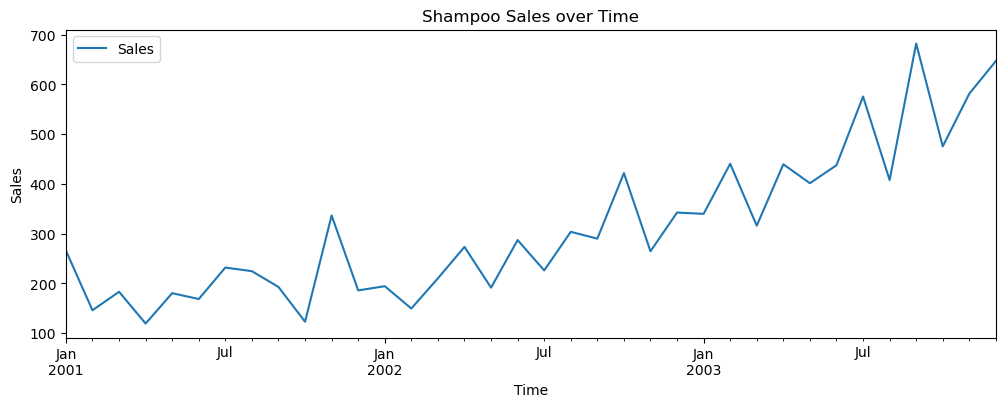

In [16]:
df.plot(figsize=(12,4))
plt.ylabel('Sales')
plt.title("Shampoo Sales over Time")
plt.xlabel('Time')
plt.show()

### Resampling

In [17]:
df.resample(rule='A')

            Sales
Month            
2001-12-31  336.5
2002-12-31  421.6
2003-12-31  682.0
-------------------------
            Sales
Month            
2001-12-31  119.3
2002-12-31  149.5
2003-12-31  315.9
-------------------------
                 Sales
Month                 
2001-12-31  196.458333
2002-12-31  262.791667
2003-12-31  478.550000
-------------------------


<AxesSubplot:xlabel='Month'>

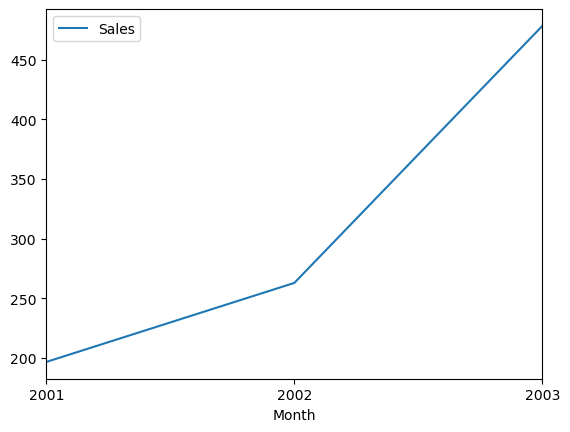

In [18]:
## Yearly
print(df.resample(rule='A').max())
print(25*"-")
print(df.resample(rule='A').min())
print(25*"-")
print(df.resample(rule='A').mean())
print(25*"-")
df.resample(rule='A').mean().plot()

            Sales
Month            
2001-01-01  266.0
2001-04-01  180.3
2001-07-01  231.8
2001-10-01  336.5
2002-01-01  210.1
2002-04-01  287.0
2002-07-01  303.6
2002-10-01  421.6
2003-01-01  440.4
2003-04-01  439.3
2003-07-01  682.0
2003-10-01  646.9
-------------------------
            Sales
Month            
2001-01-01  145.9
2001-04-01  119.3
2001-07-01  192.8
2001-10-01  122.9
2002-01-01  149.5
2002-04-01  191.4
2002-07-01  226.0
2002-10-01  264.5
2003-01-01  315.9
2003-04-01  401.3
2003-07-01  407.6
2003-10-01  475.3
-------------------------
                 Sales
Month                 
2001-01-01  198.333333
2001-04-01  156.033333
2001-07-01  216.366667
2001-10-01  215.100000
2002-01-01  184.633333
2002-04-01  250.566667
2002-07-01  273.166667
2002-10-01  342.800000
2003-01-01  365.333333
2003-04-01  426.000000
2003-07-01  555.033333
2003-10-01  567.833333
-------------------------


<AxesSubplot:xlabel='Month'>

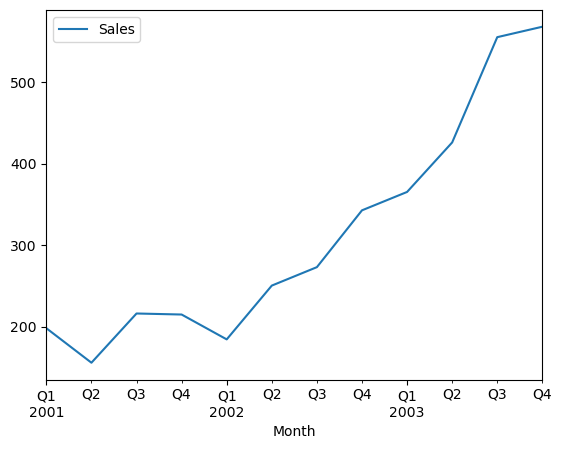

In [19]:
## Quaterly
print(df.resample(rule='QS').max())
print(25*"-")
print(df.resample(rule='QS').min())
print(25*"-")
print(df.resample(rule='QS').mean())
print(25*"-")
df.resample(rule='QS').mean().plot()

            Sales
Month            
2001-01-31  266.0
2001-02-28  145.9
2001-03-31  183.1
2001-04-30  119.3
2001-05-31  180.3
2001-06-30  168.5
2001-07-31  231.8
2001-08-31  224.5
2001-09-30  192.8
2001-10-31  122.9
2001-11-30  336.5
2001-12-31  185.9
2002-01-31  194.3
2002-02-28  149.5
2002-03-31  210.1
2002-04-30  273.3
2002-05-31  191.4
2002-06-30  287.0
2002-07-31  226.0
2002-08-31  303.6
2002-09-30  289.9
2002-10-31  421.6
2002-11-30  264.5
2002-12-31  342.3
2003-01-31  339.7
2003-02-28  440.4
2003-03-31  315.9
2003-04-30  439.3
2003-05-31  401.3
2003-06-30  437.4
2003-07-31  575.5
2003-08-31  407.6
2003-09-30  682.0
2003-10-31  475.3
2003-11-30  581.3
2003-12-31  646.9
-------------------------
            Sales
Month            
2001-01-31  266.0
2001-02-28  145.9
2001-03-31  183.1
2001-04-30  119.3
2001-05-31  180.3
2001-06-30  168.5
2001-07-31  231.8
2001-08-31  224.5
2001-09-30  192.8
2001-10-31  122.9
2001-11-30  336.5
2001-12-31  185.9
2002-01-31  194.3
2002-02-28  149.5
20

<AxesSubplot:xlabel='Month'>

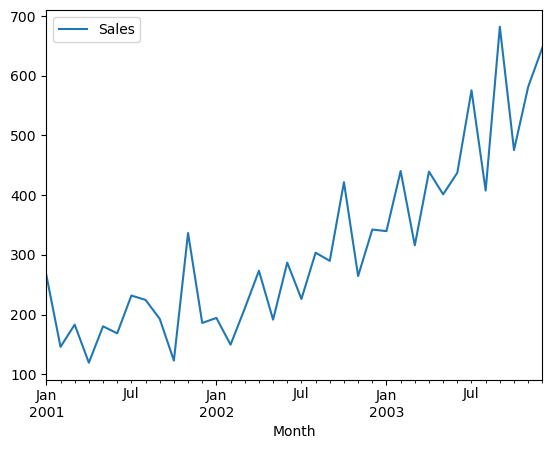

In [20]:
## Monthly
print(df.resample(rule='M').max())
print(25*"-")
print(df.resample(rule='M').min())
print(25*"-")
print(df.resample(rule='M').mean())
print(25*"-")
df.resample(rule='M').mean().plot()

## Rolling

### Simple Moving Average

In [21]:
df.rolling(10)

Rolling [window=10,center=False,axis=0,method=single]

In [22]:
df['Sales Rolling: 5'] = df['Sales'].rolling(5).mean()

In [23]:
df['Sales Rolling: 10'] = df['Sales'].rolling(10).mean()
df.head(10)

,Sales,Sales Rolling: 5,Sales Rolling: 10
Month,,,
2001-01-01,266.0,NaN,NaN
2001-02-01,145.9,NaN,NaN
2001-03-01,183.1,NaN,NaN
2001-04-01,119.3,NaN,NaN
2001-05-01,180.3,178.92,NaN
2001-06-01,168.5,159.42,NaN
2001-07-01,231.8,176.60,NaN
2001-08-01,224.5,184.88,NaN
2001-09-01,192.8,199.58,NaN


In [24]:
df['Sales Rolling: 15'] = df['Sales'].rolling(15).mean()

In [25]:
df['Sales Rolling: 20'] = df['Sales'].rolling(20).mean()

<AxesSubplot:xlabel='Month'>

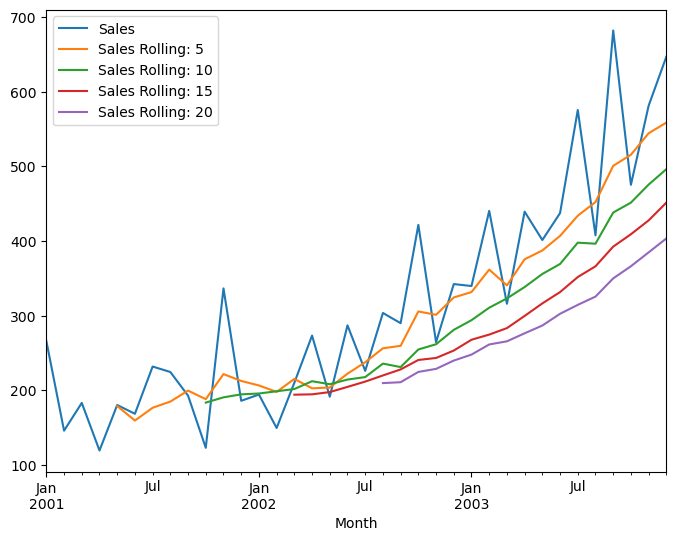

In [26]:
df.plot(figsize=(8,6))

### Cumulative Moving Average

<AxesSubplot:xlabel='Month'>

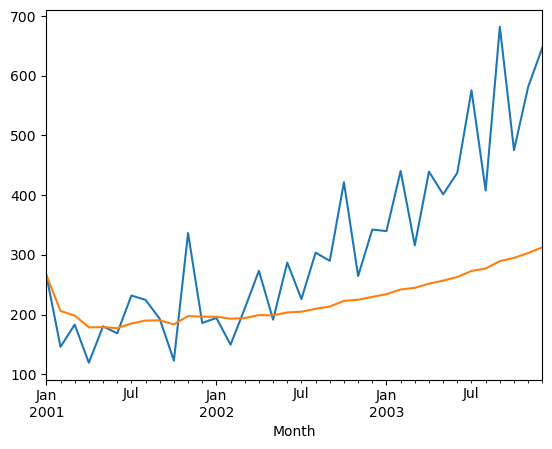

In [28]:
df['Sales'].plot()
df['Sales'].expanding().mean().plot()

### Exponential Moving Average

<AxesSubplot:xlabel='Month'>

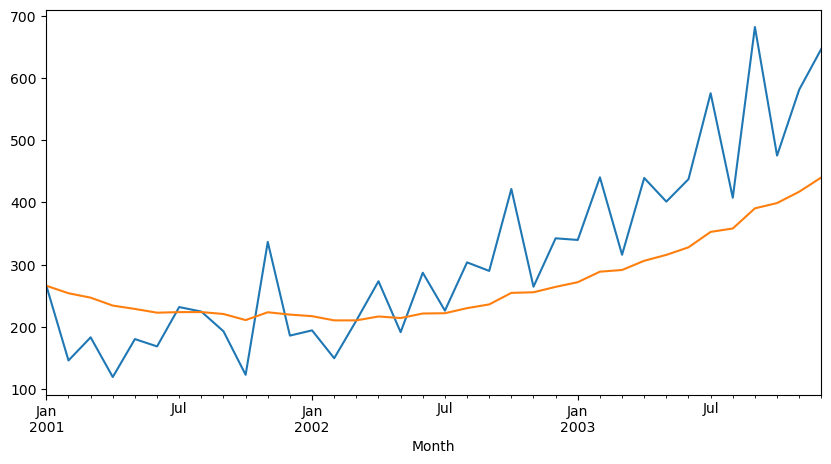

In [29]:
df['Sales'].plot()
df['Sales'].ewm(alpha=0.1,adjust=False).mean().plot(figsize=(10,5))

### Explonential Weighted Moving Average

<AxesSubplot:xlabel='Month'>

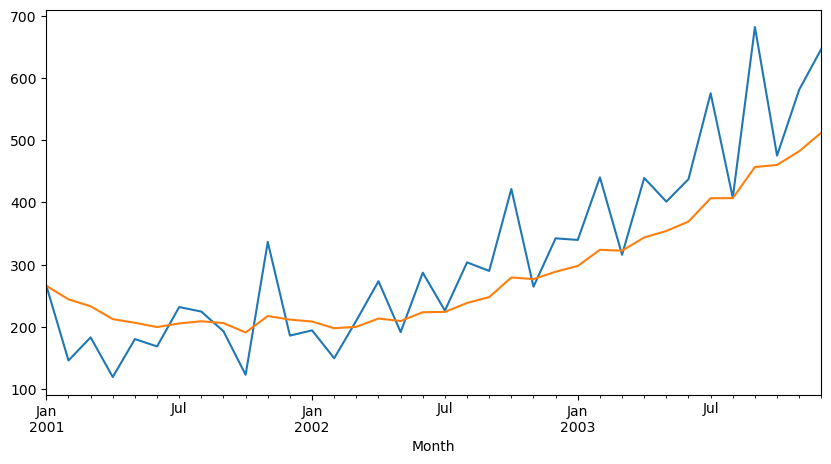

In [30]:
df['Sales'].plot()
df['Sales'].ewm(adjust=False,span=10).mean().plot(figsize=(10,5))

In [31]:
df.drop('Sales Rolling: 5',axis=1,inplace=True)
df.drop('Sales Rolling: 10',axis=1,inplace=True)
df.drop('Sales Rolling: 15',axis=1,inplace=True)
df.drop('Sales Rolling: 20',axis=1,inplace=True)

In [32]:
df.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


### ARIMA: pdq

#### DIfferencing: d

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
test_result=adfuller(df['Sales'])

In [35]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [36]:
adfuller_test(df['Sales'])

ADF Test Statistic : 3.0601420836411815
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [38]:
df['Sales'].shift(1).head()

Month
2001-01-01      NaN
2001-02-01    266.0
2001-03-01    145.9
2001-04-01    183.1
2001-05-01    119.3
Name: Sales, dtype: float64

In [39]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [40]:
## Again test dickey fuller test
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.249074055553854
p-value : 1.7998574141687034e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [41]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -0.04561553414248672
p-value : 0.9545931714075301
#Lags Used : 6
Number of Observations Used : 17
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

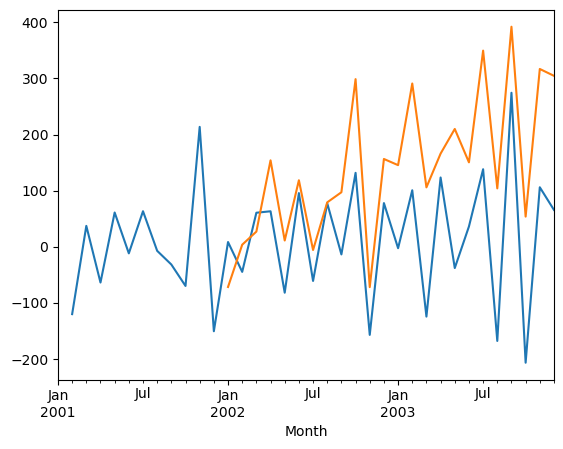

In [43]:
df['Sales First Difference'].plot()
df['Seasonal First Difference'].plot()

#### Auto Regression

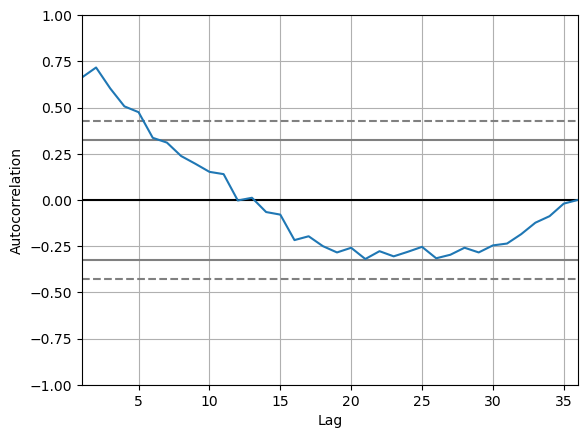

In [48]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [80]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

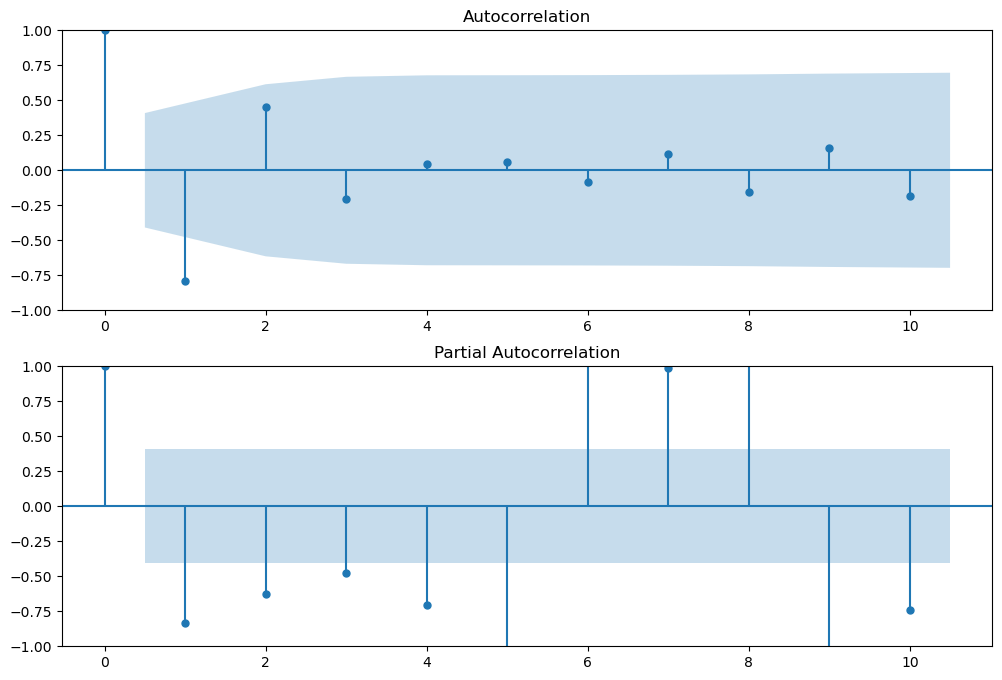

In [103]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=10,ax=ax2)

In [88]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [104]:
model=ARIMA(df['Sales'],order=(2,1,1))
model_fit=model.fit()

C:\Users\sriva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sriva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sriva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [105]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -199.556
Date:                Thu, 01 Dec 2022   AIC                            407.112
Time:                        02:16:27   BIC                            413.334
Sample:                    01-01-2001   HQIC                           409.260
                         - 12-01-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6660      0.167     -9.966      0.000      -1.994      -1.338
ar.L2         -0.7467      0.153     -4.882      0.000      -1.046      -0.447
ma.L1          0.9998     57.974      0.017      0.986    -112.626     114.626
sigma2      4864.0270   2.82e+05      0.017      0.986   -5.47e+05    5.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.30   Prob(JB):                         0.61
Heteroskedasticity (H):               1.16   Skew:                             0.27
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

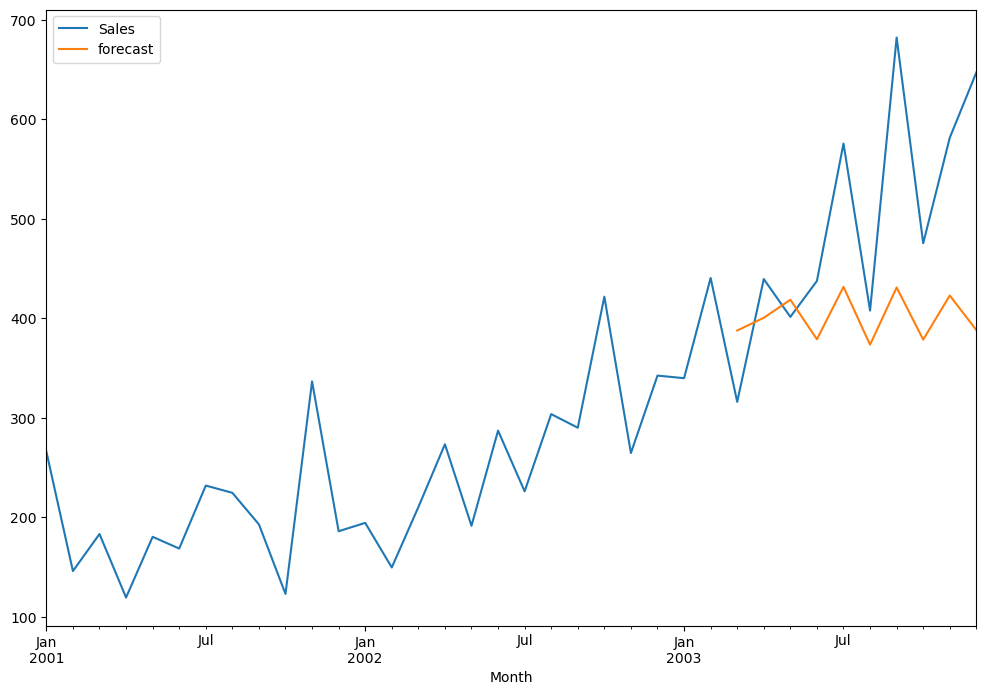

In [117]:
df['forecast']=model_fit.predict(start='2003-03-01',dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [44]:
import itertools

In [45]:
p=range(0,8)
d=range(0,2)
q=range(0,8)

In [46]:
pdq_combination=list(itertools.product(p,d,q))

In [48]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [49]:
len(pdq_combination)

128

In [50]:
for pdq in pdq_combination:
    try:
        model=ARIMA(df['Sales'],order=pdq).fit()
        pred_model

IndentationError: expected an indented block (893091981.py, line 2)

#### SARIMA

In [137]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(2, 1, 0),seasonal_order=(2,1,1,12))
results=model.fit()

C:\Users\sriva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sriva\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sriva\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sriva\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

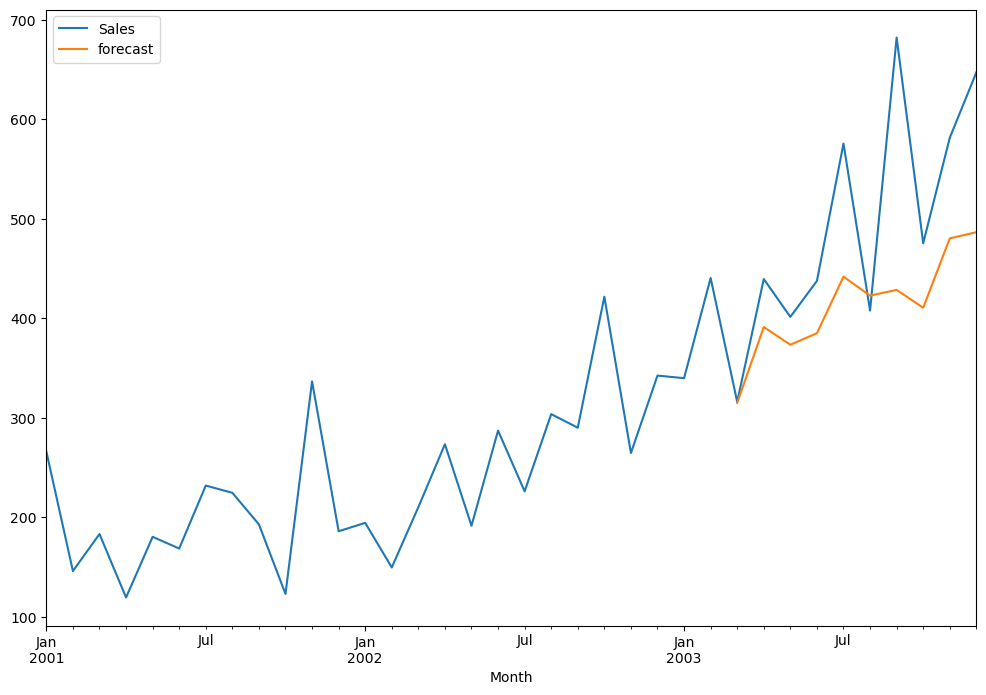

In [138]:
df['forecast']=results.predict(start="2003-03-01",dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [118]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [119]:
future_dates

[Timestamp('2003-12-01 00:00:00'),
 Timestamp('2004-01-01 00:00:00'),
 Timestamp('2004-02-01 00:00:00'),
 Timestamp('2004-03-01 00:00:00'),
 Timestamp('2004-04-01 00:00:00'),
 Timestamp('2004-05-01 00:00:00'),
 Timestamp('2004-06-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2004-08-01 00:00:00'),
 Timestamp('2004-09-01 00:00:00'),
 Timestamp('2004-10-01 00:00:00'),
 Timestamp('2004-11-01 00:00:00'),
 Timestamp('2004-12-01 00:00:00'),
 Timestamp('2005-01-01 00:00:00'),
 Timestamp('2005-02-01 00:00:00'),
 Timestamp('2005-03-01 00:00:00'),
 Timestamp('2005-04-01 00:00:00'),
 Timestamp('2005-05-01 00:00:00'),
 Timestamp('2005-06-01 00:00:00'),
 Timestamp('2005-07-01 00:00:00'),
 Timestamp('2005-08-01 00:00:00'),
 Timestamp('2005-09-01 00:00:00'),
 Timestamp('2005-10-01 00:00:00'),
 Timestamp('2005-11-01 00:00:00')]

In [120]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [121]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,Seasonal 12 Difference,forecast
2005-07-01,NaN,NaN,NaN,NaN,NaN
2005-08-01,NaN,NaN,NaN,NaN,NaN
2005-09-01,NaN,NaN,NaN,NaN,NaN
2005-10-01,NaN,NaN,NaN,NaN,NaN
2005-11-01,NaN,NaN,NaN,NaN,NaN


In [122]:
future_df=pd.concat([df,future_datest_df])

In [124]:
future_df

,Sales,Sales First Difference,Seasonal First Difference,Seasonal 12 Difference,forecast
2001-01-01,266.0,NaN,NaN,NaN,NaN
2001-02-01,145.9,-120.1,-120.1,NaN,NaN
2001-03-01,183.1,37.2,37.2,NaN,NaN
2001-04-01,119.3,-63.8,-63.8,NaN,NaN
2001-05-01,180.3,61.0,61.0,NaN,NaN
2001-06-01,168.5,-11.8,-11.8,NaN,NaN
2001-07-01,231.8,63.3,63.3,NaN,NaN
2001-08-01,224.5,-7.3,-7.3,NaN,NaN
2001-09-01,192.8,-31.7,-31.7,NaN,NaN
2001-10-01,122.9,-69.9,-69.9,NaN,NaN


<AxesSubplot:>

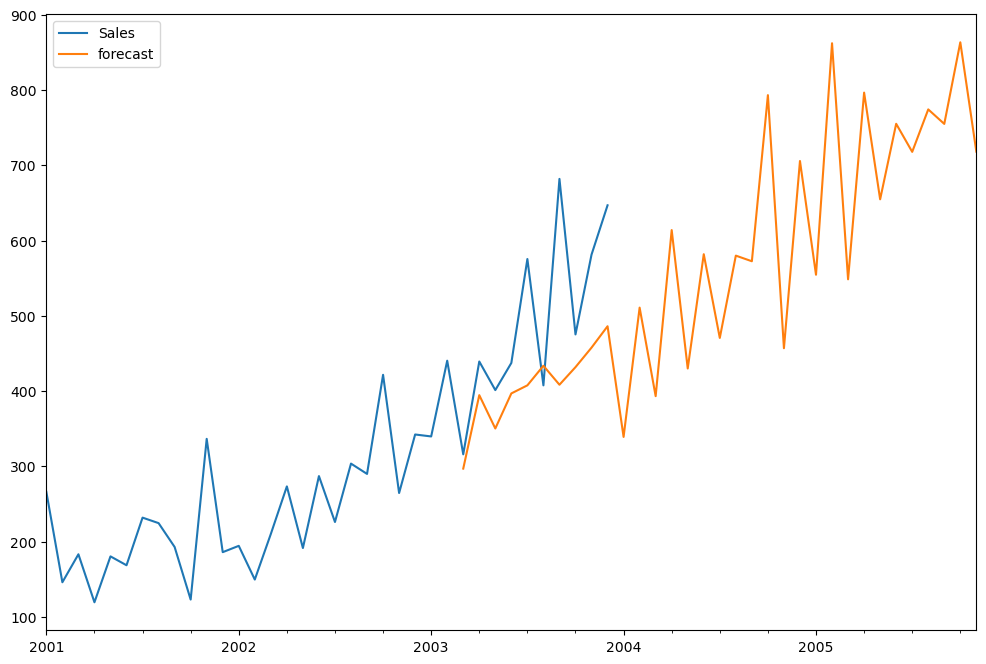

In [128]:
future_df['forecast'] = results.predict(start='2003-03-01',end='2005-11-01', dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

<AxesSubplot:>

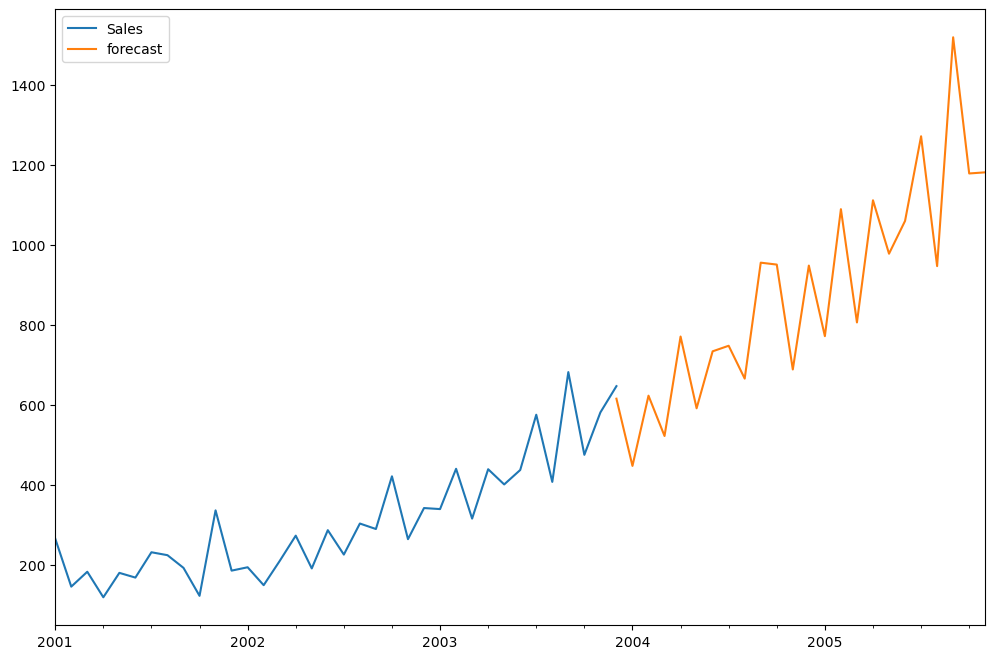

In [139]:
future_df['forecast'] = results.predict(start='2003-12-01',end='2005-11-01', dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 